In [ ]:
import pandas as pd
import nltk

In [ ]:
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
!pip install vaderSentiment

In [ ]:
data=pd.read_csv('/content/Full_Intel_Product_Reviews.csv')
data.head(10)

,country,date,reviewDescription,reviewTitle,variant
0,United States,12-04-2024,"Great price, great performance, great product....",Amazing,Intel-core-i5-12000
1,United States,13-03-2024,So far it has been a good performance in gamin...,Very good performance,Intel-core-i5-12000
2,United States,26-02-2022,"Upgraded a 2600K pc with this CPU, B660 board ...",Solid bang for buck and with a decent cooler.,Intel-core-i5-12000
3,United States,06-11-2023,This cpu matched with an amd or nvidia card is...,Very good for its price,Intel-core-i5-12000
4,United States,07-06-2024,Es un excelente producto de fabricación Intel ...,Excelente producto,Intel-core-i5-12000
5,United States,05-04-2024,Llegó en el tiempo indicado por Amazon y el cu...,Buena compra y segura,Intel-core-i5-12000
6,United States,13-05-2024,Puede prácticamente con todos los juegos combi...,Es lo mejor para gaming competitivo,Intel-core-i5-12000
7,United States,06-04-2024,Was running a little to hot with stock cooler-...,needs a real air cooler,Intel-core-i5-12000
8,United States,11-04-2024,El vendedor incluye pasta térmica y disipador ...,Buena compra,Intel-core-i5-12000
9,United States,17-02-2024,Simple CPU compared to some of the hybrid CPUs...,6 power cores only,Intel-core-i5-12000


In [ ]:
data=data.drop(['country','reviewTitle'],axis=1)
data.head(10)

,date,reviewDescription,variant
0,12-04-2024,"Great price, great performance, great product....",Intel-core-i5-12000
1,13-03-2024,So far it has been a good performance in gamin...,Intel-core-i5-12000
2,26-02-2022,"Upgraded a 2600K pc with this CPU, B660 board ...",Intel-core-i5-12000
3,06-11-2023,This cpu matched with an amd or nvidia card is...,Intel-core-i5-12000
4,07-06-2024,Es un excelente producto de fabricación Intel ...,Intel-core-i5-12000
5,05-04-2024,Llegó en el tiempo indicado por Amazon y el cu...,Intel-core-i5-12000
6,13-05-2024,Puede prácticamente con todos los juegos combi...,Intel-core-i5-12000
7,06-04-2024,Was running a little to hot with stock cooler-...,Intel-core-i5-12000
8,11-04-2024,El vendedor incluye pasta térmica y disipador ...,Intel-core-i5-12000
9,17-02-2024,Simple CPU compared to some of the hybrid CPUs...,Intel-core-i5-12000


In [ ]:
data.describe()

,date,reviewDescription,variant
count,2130,2130,2130
unique,819,2034,9
top,13-06-2024,Great CPU,Intel-core-i5-13000
freq,12,16,559


In [ ]:
missing_values = data.isnull().sum()
print(missing_values)

date                 0
reviewDescription    0
variant              0
dtype: int64


In [ ]:
duplicate_rows = data.duplicated()
duplicate_rows

0       False
1       False
2       False
3       False
4       False
        ...  
2125    False
2126    False
2127    False
2128    False
2129    False
Length: 2130, dtype: bool

In [ ]:
import re

In [ ]:
def clean_text(text):
   # remove URLs
  text = re.sub(r'http\S+', '', text)

  # remove special characters and punctuation
  text = re.sub(r'[^a-zA-Z\s]', '', text)
  text = re.sub(r'<.*?>', '', text)
  text = re.sub(r"n't", " not", text)
  text = re.sub(r"'re", " are", text)
  text = re.sub(r"'s", " is", text)
  text = re.sub(r"'d", " would", text)
  text = re.sub(r"'ll", " will", text)
  text = re.sub(r"'t", " not", text)
  text = re.sub(r"'ve", " have", text)
  text = re.sub(r"'m", " am", text)
  text = text.lower()
  text = re.sub(r'[^\w\s]', '', text)

  # convert text to lowercase
  text = text.lower()

  # tokenize the text
  text = nltk.word_tokenize(text)

  # remove stopwords
  text = [word for word in text if word not in nltk.corpus.stopwords.words('english')]

  # remove short words
  text = [word for word in text if len(word) > 2]

  # lemmatize the words
  lemmatizer = nltk.stem.WordNetLemmatizer()
  text = [lemmatizer.lemmatize(word) for word in text]
  return ' '.join(text)

data['reviewDescription'] = data['reviewDescription'].apply(clean_text)


In [ ]:
data.head(10)

,date,reviewDescription,variant
0,12-04-2024,great price great performance great product do...,Intel-core-i5-12000
1,13-03-2024,far good performance gaming productivity,Intel-core-i5-12000
2,26-02-2022,upgraded cpu board mhz ram feel incredibly sna...,Intel-core-i5-12000
3,06-11-2023,cpu matched amd nvidia card powerful running g...,Intel-core-i5-12000
4,07-06-2024,excelente producto fabricacin intel generacin,Intel-core-i5-12000
5,05-04-2024,lleg tiempo indicado por amazon currier nacion...,Intel-core-i5-12000
6,13-05-2024,puede prcticamente con todos los juegos combin...,Intel-core-i5-12000
7,06-04-2024,running little hot stock cooler added digital ...,Intel-core-i5-12000
8,11-04-2024,vendedor incluye pasta trmica disipador proces...,Intel-core-i5-12000
9,17-02-2024,simple cpu compared hybrid cpu efficiency core...,Intel-core-i5-12000


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

data['compound_score'] = data['reviewDescription'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

In [ ]:
data.head(50)

,date,reviewDescription,variant,compound_score
0,12-04-2024,great price great performance great product do...,Intel-core-i5-12000,0.9702
1,13-03-2024,far good performance gaming productivity,Intel-core-i5-12000,0.4404
2,26-02-2022,upgraded cpu board mhz ram feel incredibly sna...,Intel-core-i5-12000,0.8481
3,06-11-2023,cpu matched amd nvidia card powerful running g...,Intel-core-i5-12000,0.6801
4,07-06-2024,excelente producto fabricacin intel generacin,Intel-core-i5-12000,0.0000
5,05-04-2024,lleg tiempo indicado por amazon currier nacion...,Intel-core-i5-12000,0.0258
6,13-05-2024,puede prcticamente con todos los juegos combin...,Intel-core-i5-12000,0.0000
7,06-04-2024,running little hot stock cooler added digital ...,Intel-core-i5-12000,0.3182
8,11-04-2024,vendedor incluye pasta trmica disipador proces...,Intel-core-i5-12000,0.0000
9,17-02-2024,simple cpu compared hybrid cpu efficiency core...,Intel-core-i5-12000,0.6240


In [ ]:
def get_sentiment(score):
  if score >= 0.05:
    return 'positive'
  elif score <= -0.05:
    return 'negative'
  else:
    return 'neutral'

data['Sentiment'] = data['compound_score'].apply(get_sentiment)

In [ ]:
data.head(50)

,date,reviewDescription,variant,compound_score,Sentiment
0,12-04-2024,great price great performance great product do...,Intel-core-i5-12000,0.9702,positive
1,13-03-2024,far good performance gaming productivity,Intel-core-i5-12000,0.4404,positive
2,26-02-2022,upgraded cpu board mhz ram feel incredibly sna...,Intel-core-i5-12000,0.8481,positive
3,06-11-2023,cpu matched amd nvidia card powerful running g...,Intel-core-i5-12000,0.6801,positive
4,07-06-2024,excelente producto fabricacin intel generacin,Intel-core-i5-12000,0.0000,neutral
5,05-04-2024,lleg tiempo indicado por amazon currier nacion...,Intel-core-i5-12000,0.0258,neutral
6,13-05-2024,puede prcticamente con todos los juegos combin...,Intel-core-i5-12000,0.0000,neutral
7,06-04-2024,running little hot stock cooler added digital ...,Intel-core-i5-12000,0.3182,positive
8,11-04-2024,vendedor incluye pasta trmica disipador proces...,Intel-core-i5-12000,0.0000,neutral
9,17-02-2024,simple cpu compared hybrid cpu efficiency core...,Intel-core-i5-12000,0.6240,positive


In [ ]:
sentiment_counts = data['Sentiment'].value_counts()
percentage = sentiment_counts / sentiment_counts.sum() * 100
print(percentage)


Sentiment
positive    49.953052
neutral     36.197183
negative    13.849765
Name: count, dtype: float64


In [ ]:
processors=data['variant'].unique()
for i in processors:
  print(i)
len(processors)

Intel-core-i5-12000
Intel-core-i7-12000
Intel-core-i9-12000
Intel-core-i5-13000
Intel-core-i7-13000
Intel-core-i9-13000
Intel-core-i9-14000
Intel-core-i7-14000
Intel-core-i5-14000


9

In [ ]:
import numpy as np

def reduce_dataset(data):
  for processor in data['variant'].unique():
    processor_data = data[data['variant'] == processor]
    num_rows = len(processor_data)
    sample_size = int(num_rows / 2)
    data = data.drop(processor_data.sample(num_rows - sample_size).index)
  return data

data = reduce_dataset(data)


In [ ]:
wanted_review=['Intel-core-i5-12000','Intel-core-i9-12000','Intel-core-i7-12000','Intel-core-i5-13000','Intel-core-i7-13000','Intel-core-i9-13000','Intel-core-i9-14000','Intel-core-i7-14000','Intel-core-i5-14000']

In [ ]:
separated_reviews = {}
for variant in wanted_review:
  separated_reviews[variant] = data[data['variant'] == variant]

In [ ]:
technical_keywords = [
    'x86', 'x64', 'ARM', 'RISC', 'CISC', 'GHz', 'Clock speed', 'Core count',
    'Thread count', 'Benchmark', 'IPC', 'Overclock', 'Turbo Boost', 'Hyper-Threading',
    'Thermal Design Power', 'TDP', 'Cache', 'L1', 'L2', 'L3', 'Intel Core',
    'Simultaneous Multithreading', 'SMT', 'Integrated Graphics', 'iGPU',
    'Thermal throttling', 'Die shrink', 'Lithography', 'PCIe lanes',
    'Memory channels', 'ECC', 'Socket type', 'LGA', 'PGA', 'BGA', 'Chipset',
    'Motherboard compatibility', 'BIOS', 'UEFI', 'Cinebench', 'Geekbench',
    'PassMark', 'SPECint', 'SPECfp', 'Prime95', 'AIDA64', 'Cooling solutions',
    'Heatsink', 'Thermal paste', 'Voltage regulation', 'Gaming', 'Workstation',
    'Server', 'Embedded systems'
]

In [ ]:
def classify_reviews(reviews, technical_keywords):
  classified_reviews = {}
  for variant, review_df in reviews.items():
    technical_reviews = []
    general_reviews = []
    for review in review_df['reviewDescription']:
      review_words = set(review.lower().split())
      if any(word in review_words for word in technical_keywords):
        technical_reviews.append(review)
      else:
        general_reviews.append(review)
    classified_reviews[variant] = {
      'technical': technical_reviews,
      'general': general_reviews
    }
  return classified_reviews

classified_reviews = classify_reviews(separated_reviews, technical_keywords)

In [ ]:
general_review_lengths = {}
for variant, reviews in classified_reviews.items():
  general_review_lengths[variant] = len(reviews['general'])

for variant, length in general_review_lengths.items():
  print(f"Variant: {variant}, General Reviews: {length}")


Variant: Intel-core-i5-12000, General Reviews: 200
Variant: Intel-core-i9-12000, General Reviews: 95
Variant: Intel-core-i7-12000, General Reviews: 89
Variant: Intel-core-i5-13000, General Reviews: 279
Variant: Intel-core-i7-13000, General Reviews: 107
Variant: Intel-core-i9-13000, General Reviews: 75
Variant: Intel-core-i9-14000, General Reviews: 139
Variant: Intel-core-i7-14000, General Reviews: 68
Variant: Intel-core-i5-14000, General Reviews: 12


In [ ]:
total_general_reviews = sum(general_review_lengths.values())
print(f"Total General Reviews: {total_general_reviews}")


Total General Reviews: 1064


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
X = data['reviewDescription']
y = data['Sentiment']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear')  # You can experiment with different kernels
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
# Train the classifier
svm_classifier.fit(X_train_vec, y_train)

SVC(kernel='linear')

In [ ]:
# Make predictions on the test set
y_pred = svm_classifier.predict(X_test_vec)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.7793427230046949
Precision: 0.8132305774073679
Recall: 0.7793427230046949
F1-score: 0.7534121923639355
Confusion Matrix:
 [[10 18 10]
 [ 0 73  8]
 [ 0 11 83]]


In [ ]:
# create document term matrix

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer = 'word')

for variant, reviews in classified_reviews.items():
  general_reviews = reviews['general']
  dtm = vectorizer.fit_transform(general_reviews)
  data_dtm = pd.DataFrame(dtm.toarray(), columns=vectorizer.get_feature_names_out())
  # data.index = general_reviews.index
  print(f"Variant: {variant}")
  print(data_dtm.head(3))


Variant: Intel-core-i5-12000
   aber  abgegeben  abgelehnt  abgestrzt  ability  able  absolut  absolutely  \
0   0.0        0.0        0.0        0.0      0.0   0.0      0.0         0.0   
1   0.0        0.0        0.0        0.0      0.0   0.0      0.0         0.0   
2   0.0        0.0        0.0        0.0      0.0   0.0      0.0         0.0   

   acaba  achieved  ...  youll  youre  youthe  youtube  zktuf  zone  zur  \
0    0.0       0.0  ...    0.0    0.0     0.0      0.0    0.0   0.0  0.0   
1    0.0       0.0  ...    0.0    0.0     0.0      0.0    0.0   0.0  0.0   
2    0.0       0.0  ...    0.0    0.0     0.0      0.0    0.0   0.0  0.0   

   zurck  zurckgebucht  zusammengebaut  
0    0.0           0.0             0.0  
1    0.0           0.0             0.0  
2    0.0           0.0             0.0  

[3 rows x 1658 columns]
Variant: Intel-core-i9-12000
   afraid  along  also  amazon  another  arrived  available  avx  away  \
0     0.0    0.0   0.0     0.0      0.0      0.0     

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import textwrap

In [ ]:
# Function for generating word clouds
def generate_wordcloud(words, variant):
  wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(words)
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.title(f'WordCloud for {variant} - General Reviews')
  plt.show()


In [ ]:
for variant, reviews in classified_reviews.items():
  general_reviews = reviews['general']
  dtm = vectorizer.fit_transform(general_reviews)
  data_dtm = pd.DataFrame(dtm.toarray().T, index=vectorizer.get_feature_names_out(), columns=general_reviews)
  print(f"Variant: {variant}")
  print(data_dtm.head(3))


Variant: Intel-core-i5-12000
           great price great performance great product doesnt break budget pair great series nvidias integrated graphic make processor great starter get dgpu  \
aber                                                     0.0                                                                                                    
abgegeben                                                0.0                                                                                                    
abgelehnt                                                0.0                                                                                                    

           far good performance gaming productivity  \
aber                                            0.0   
abgegeben                                       0.0   
abgelehnt                                       0.0   

           excelente producto fabricacin intel generacin  \
aber                                         

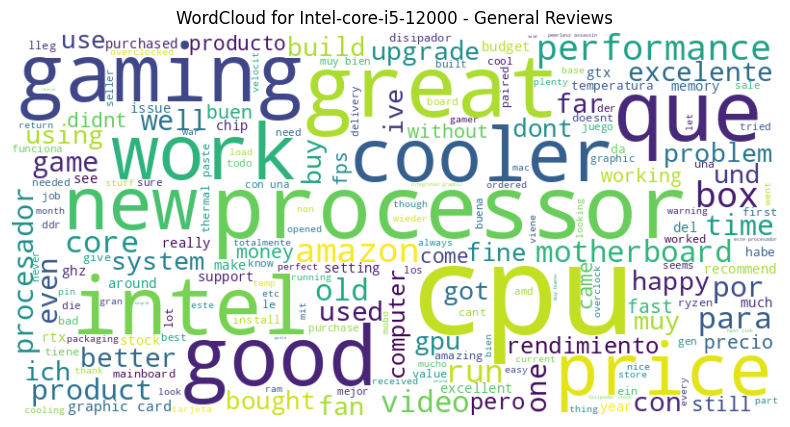

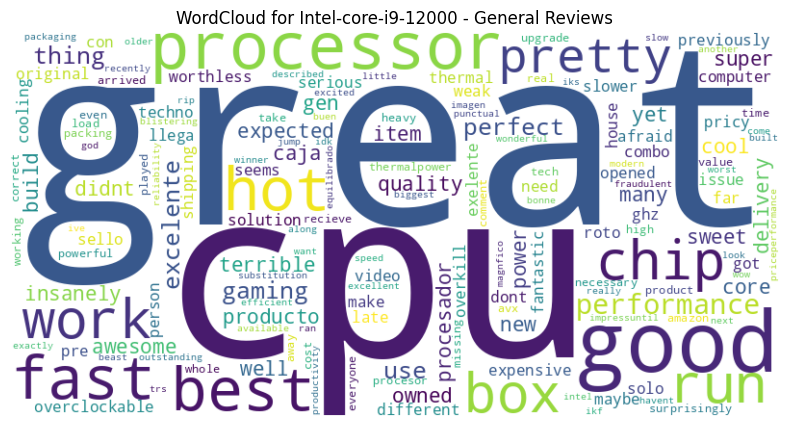

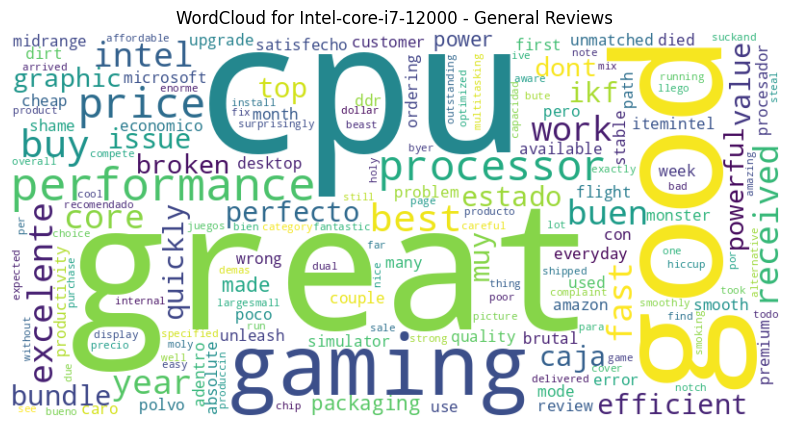

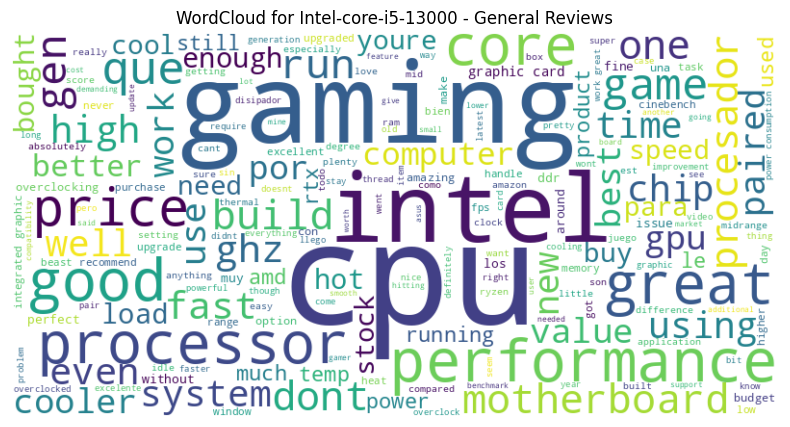

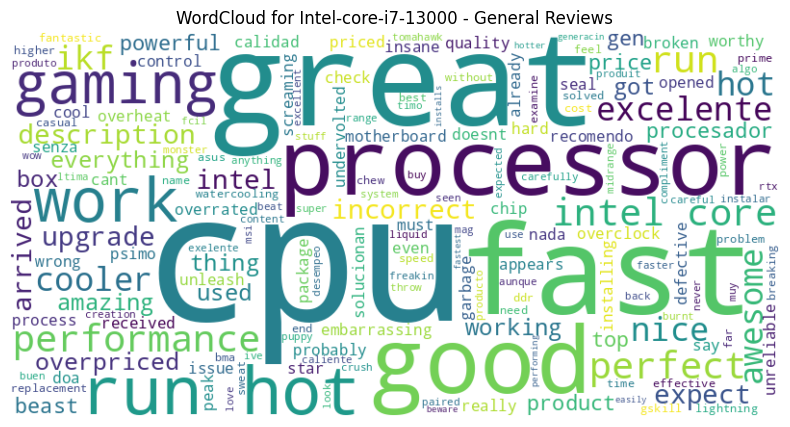

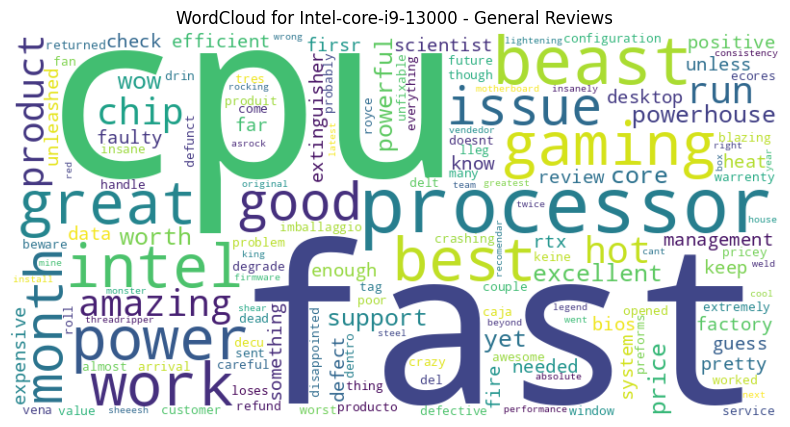

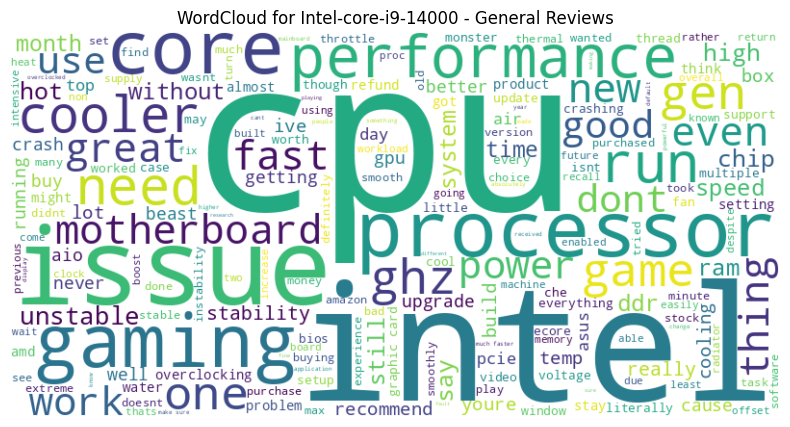

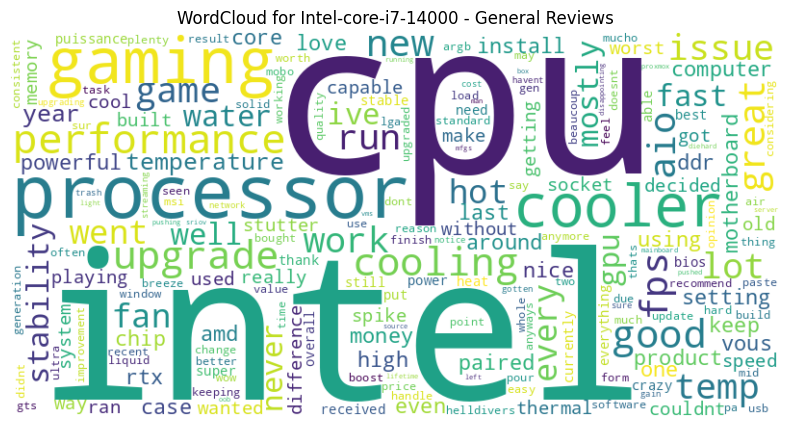

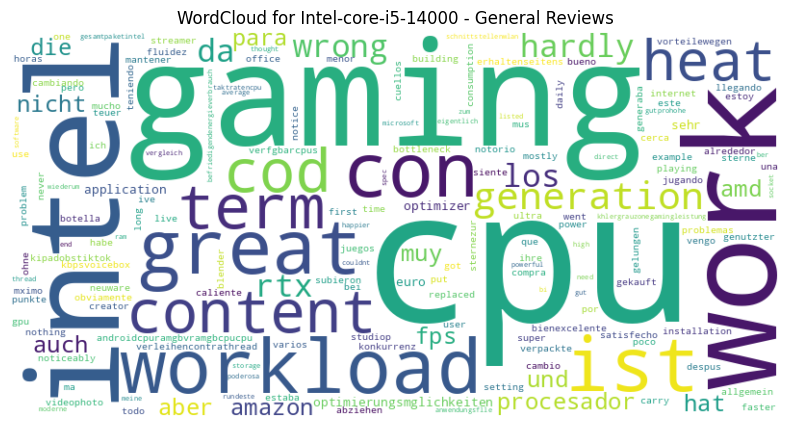

In [ ]:
# Function for generating word clouds
def generate_wordcloud(words, variant):
  wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(words)
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.title(f'WordCloud for {variant} - General Reviews')
  plt.show()

for variant, reviews in classified_reviews.items():
  general_reviews = reviews['general']
  all_words = ' '.join(general_reviews)
  generate_wordcloud(all_words, variant)
  print("\n")

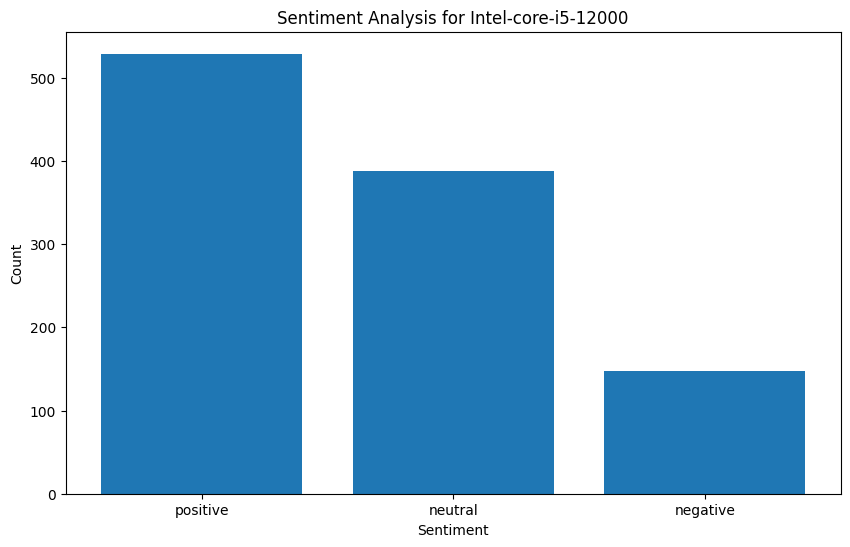

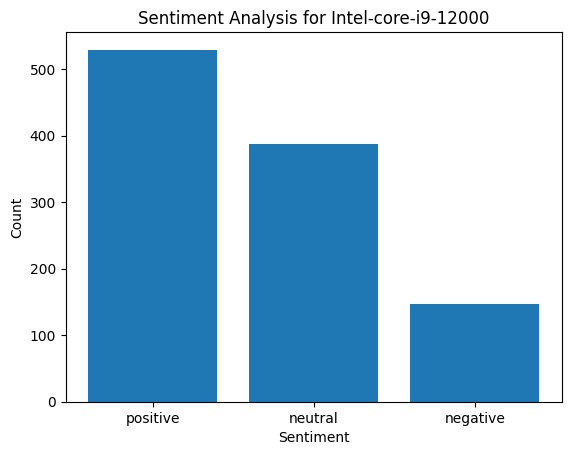

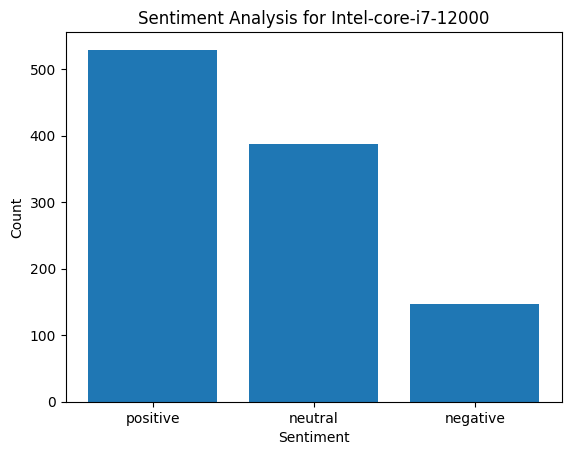

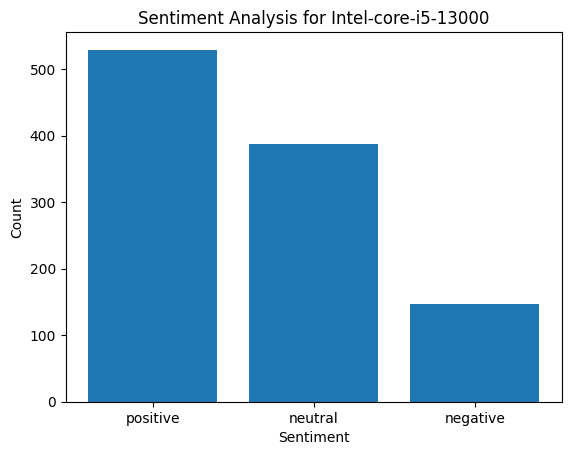

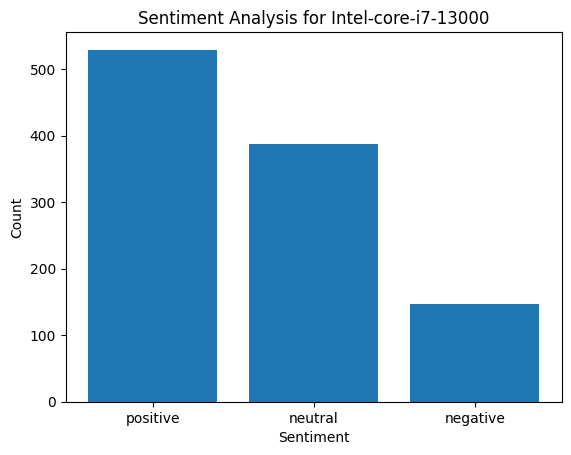

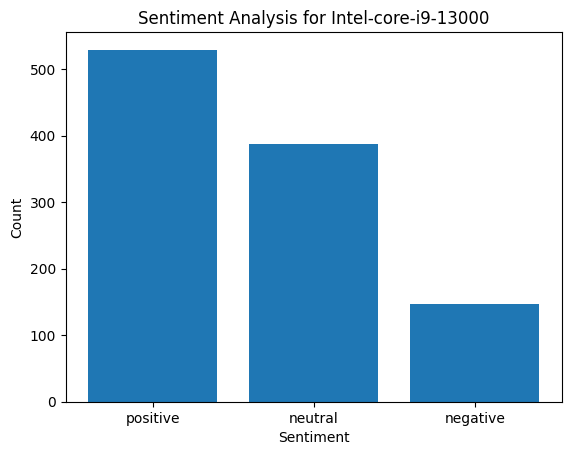

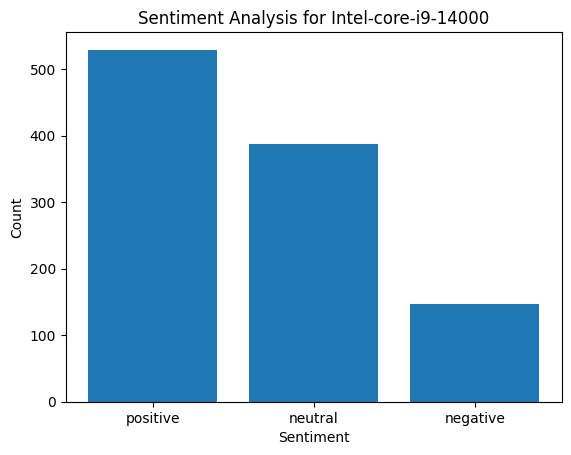

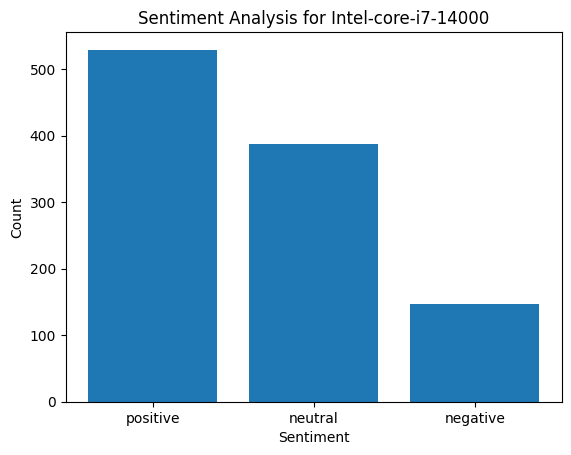

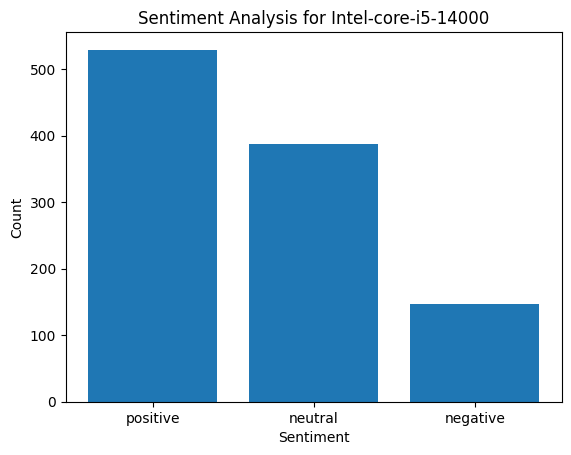

In [ ]:
#visualize the data reviews and sentiment for each variant
plt.figure(figsize=(10, 6))
for variant, reviews in classified_reviews.items():
  sentiment_counts = data['Sentiment'].value_counts()
  plt.bar(sentiment_counts.index, sentiment_counts.values)
  plt.title(f'Sentiment Analysis for {variant}')
  plt.xlabel('Sentiment')
  plt.ylabel('Count')
  plt.show()


In [ ]:
import seaborn as sns

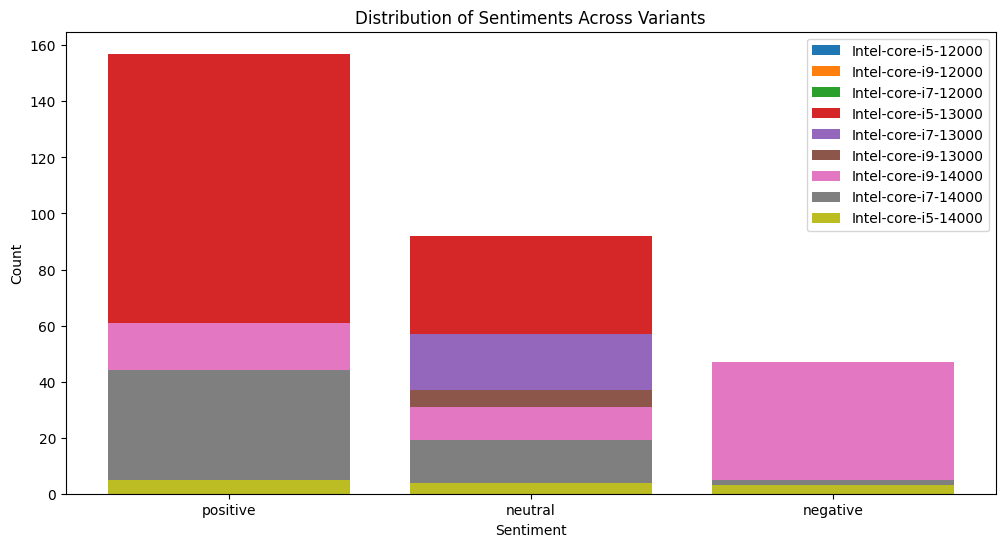

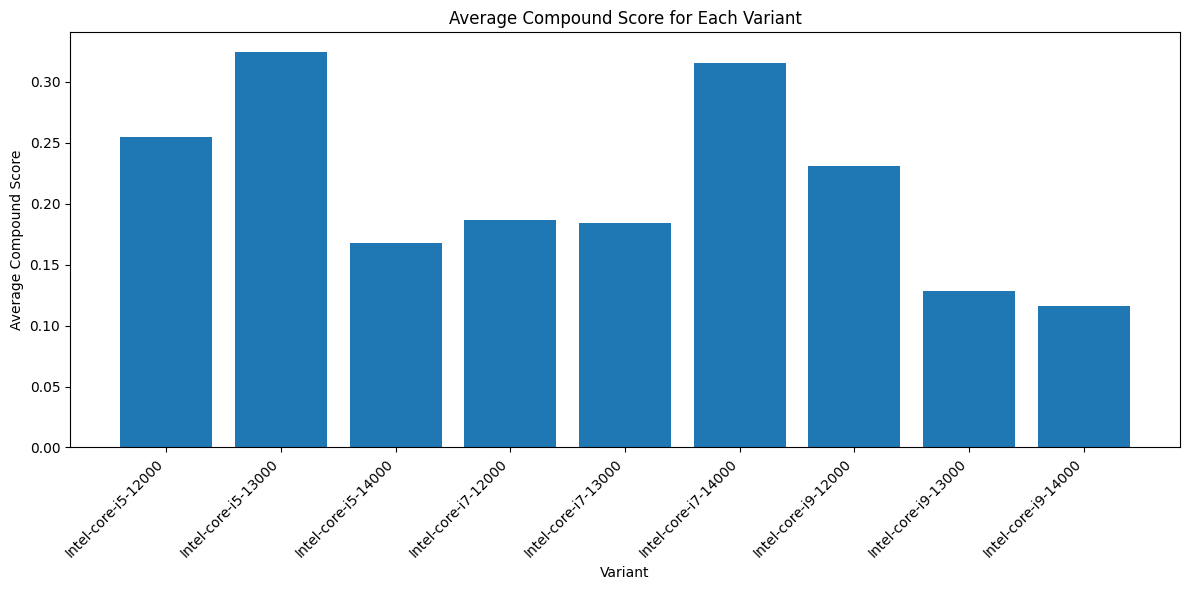

Top 10 words for Intel-core-i5-12000:
cpu          73
processor    30
great        28
que          27
good         26
intel        25
gaming       25
work         23
cooler       21
new          21
Name: count, dtype: int64


Top 10 words for Intel-core-i9-12000:
cpu          9
great        9
processor    6
good         6
fast         5
best         5
hot          5
work         4
box          4
pretty       4
Name: count, dtype: int64


Top 10 words for Intel-core-i7-12000:
cpu            14
great          13
good            9
gaming          6
performance     6
price           5
processor       5
buy             4
best            4
received        3
Name: count, dtype: int64


Top 10 words for Intel-core-i5-13000:
cpu            119
gaming          66
intel           46
great           46
performance     43
processor       42
good            42
core            39
price           34
get             31
Name: count, dtype: int64


Top 10 words for Intel-core-i7-13000:
cpu          20
ru

In [ ]:
# Distribution of sentiments across variants
plt.figure(figsize=(12, 6))
for variant in wanted_review:
  variant_data = data[data['variant'] == variant]
  sentiment_counts = variant_data['Sentiment'].value_counts()
  plt.bar(sentiment_counts.index, sentiment_counts.values, label=variant)

plt.title('Distribution of Sentiments Across Variants')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.legend()
plt.show()

# Average compound score for each variant
average_scores = data.groupby('variant')['compound_score'].mean()
plt.figure(figsize=(12, 6))
plt.bar(average_scores.index, average_scores.values)
plt.title('Average Compound Score for Each Variant')
plt.xlabel('Variant')
plt.ylabel('Average Compound Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Word frequency analysis for each variant
top_words_per_variant = {}
for variant, reviews in classified_reviews.items():
  general_reviews = reviews['general']
  all_words = ' '.join(general_reviews).lower().split()
  word_freq = pd.Series(all_words).value_counts()
  top_words_per_variant[variant] = word_freq.head(10)

for variant, top_words in top_words_per_variant.items():
  print(f"Top 10 words for {variant}:")
  print(top_words)
  print("\n")